# Scrapping top repository for github topics


### Introduction about web scrapping

Web scraping, also called web data mining or web harvesting, Web scraping is the process of extract, parse, download and organize useful information from the web automatically.

Unlike screen scraping, which only copies pixels displayed on screen, web scraping extracts underlying HTML code and, with it, data stored in a database.


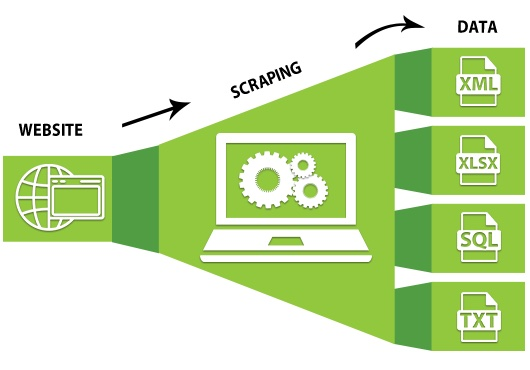

### Introduction about GitHub
GitHub, is a cloud based hosting service for software development projects that use the Git revision control system.GitHub is a social network for programmers.It is the world's largest coding community.Github allows you to take part in collaboration by forking projects, sending and pulling requests, and monitoring development.

GitHub offers both paid plans for private repositories, and free accounts for open source projects.

It offers the distributed version control and source code management (SCM) functionality of Git, plus its own features. It provides access control and several collaboration features such as bug tracking, feature requests, task management, continuous integration for every project.

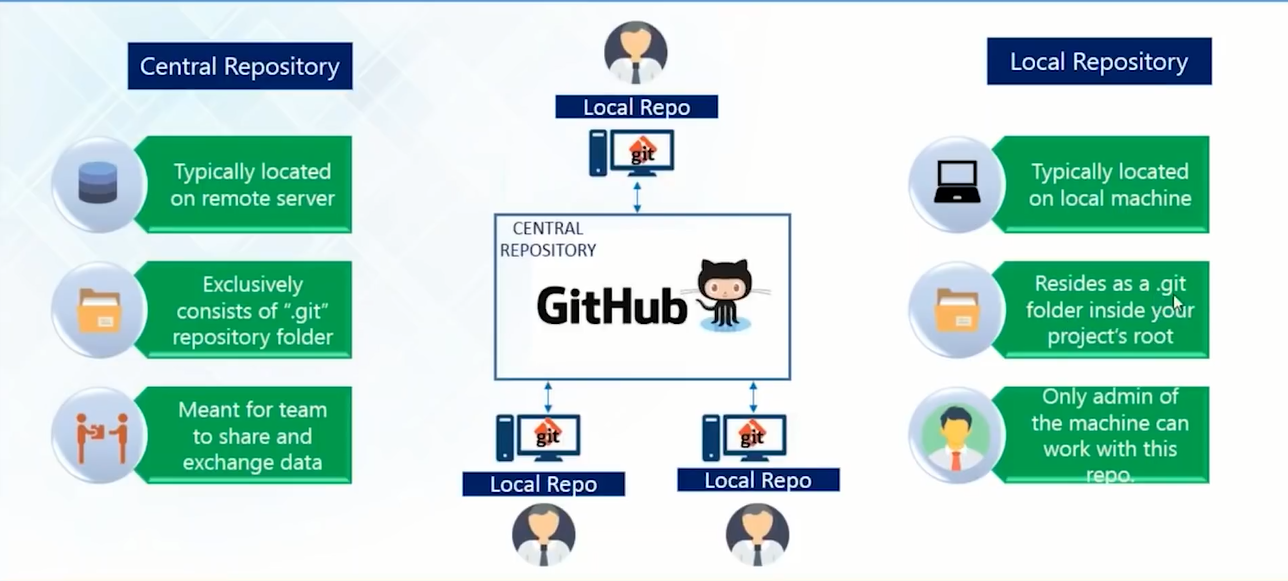

#### project outlines

- We're going to scarpe https://github.com/topics
- We'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description
- For each topic, we'll get the top 30 repository in the topic from the topic page
- For each repository, we'll grab the repo name, username, stars and repo URL
- For each topic we will create a CSV file in the following format:

Repo Name,Username,Stars,Repository URL
nfinite-scrroll,metafizzy,7100,https://github.com/metafizzy
Blog,ljianshu,7100,https://github.com/ljianshu
unfect,devlopit,5300,https://github.com/developit


## Tools used to scrape the list of topics from Github

- Requests : to download the page
- BS4 : to parse and extract information
- Converting to a Pandas DataFrame

## Requests

The requests allows you to send HTTP requests using Python.
The HTTP request returns a Response Object with all the response data (content, encoding, status, etc)

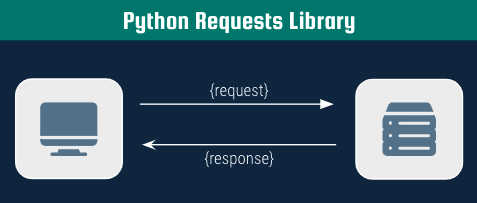

In [36]:
import requests

## Beautiful Soup : To parse and extract information
    
BeautifulSoup is a Python library for pulling data out of HTML and XML files.


Beautiful Soup a Python liberary is used here to get data from the GitHup Topics page which is designed using HTML. This python package is used to parse the HTML document that can be used to extract data from that particular page, this is essential for web scraping.

In [77]:
import requests
from bs4 import BeautifulSoup

def get_topics_page():
    
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

In [79]:
doc =get_topics_page()

In [80]:
type(doc)

bs4.BeautifulSoup

In [81]:
doc.find('a')

<a class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>

In [83]:
doc=get_topics_page()
doc


<!DOCTYPE html>

<html data-a11y-animated-images="system" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-92c7d381038e.css" integrity="sha512-ksfTgQOOnE+FFXf+yNfVjKSlEckJAdufFIYGK7ZjRhWcZgzAGcmZqqArTgMLpu90FwthqcCX4ldDgKXbmVMeuQ==" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-d4a90c367f0c.css" integrity="sha512-1KkMNn8M/al/dtzBLupRwkIOgnA9MWkm8oxS+sol

### Get_topic_titles can be used to get the list of titles



In [84]:
def get_topic_titles(doc):
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles               
                 

### Creating some helper functions to parse information from the page

To get topic titles, we can pick `p` tags with the `class`...

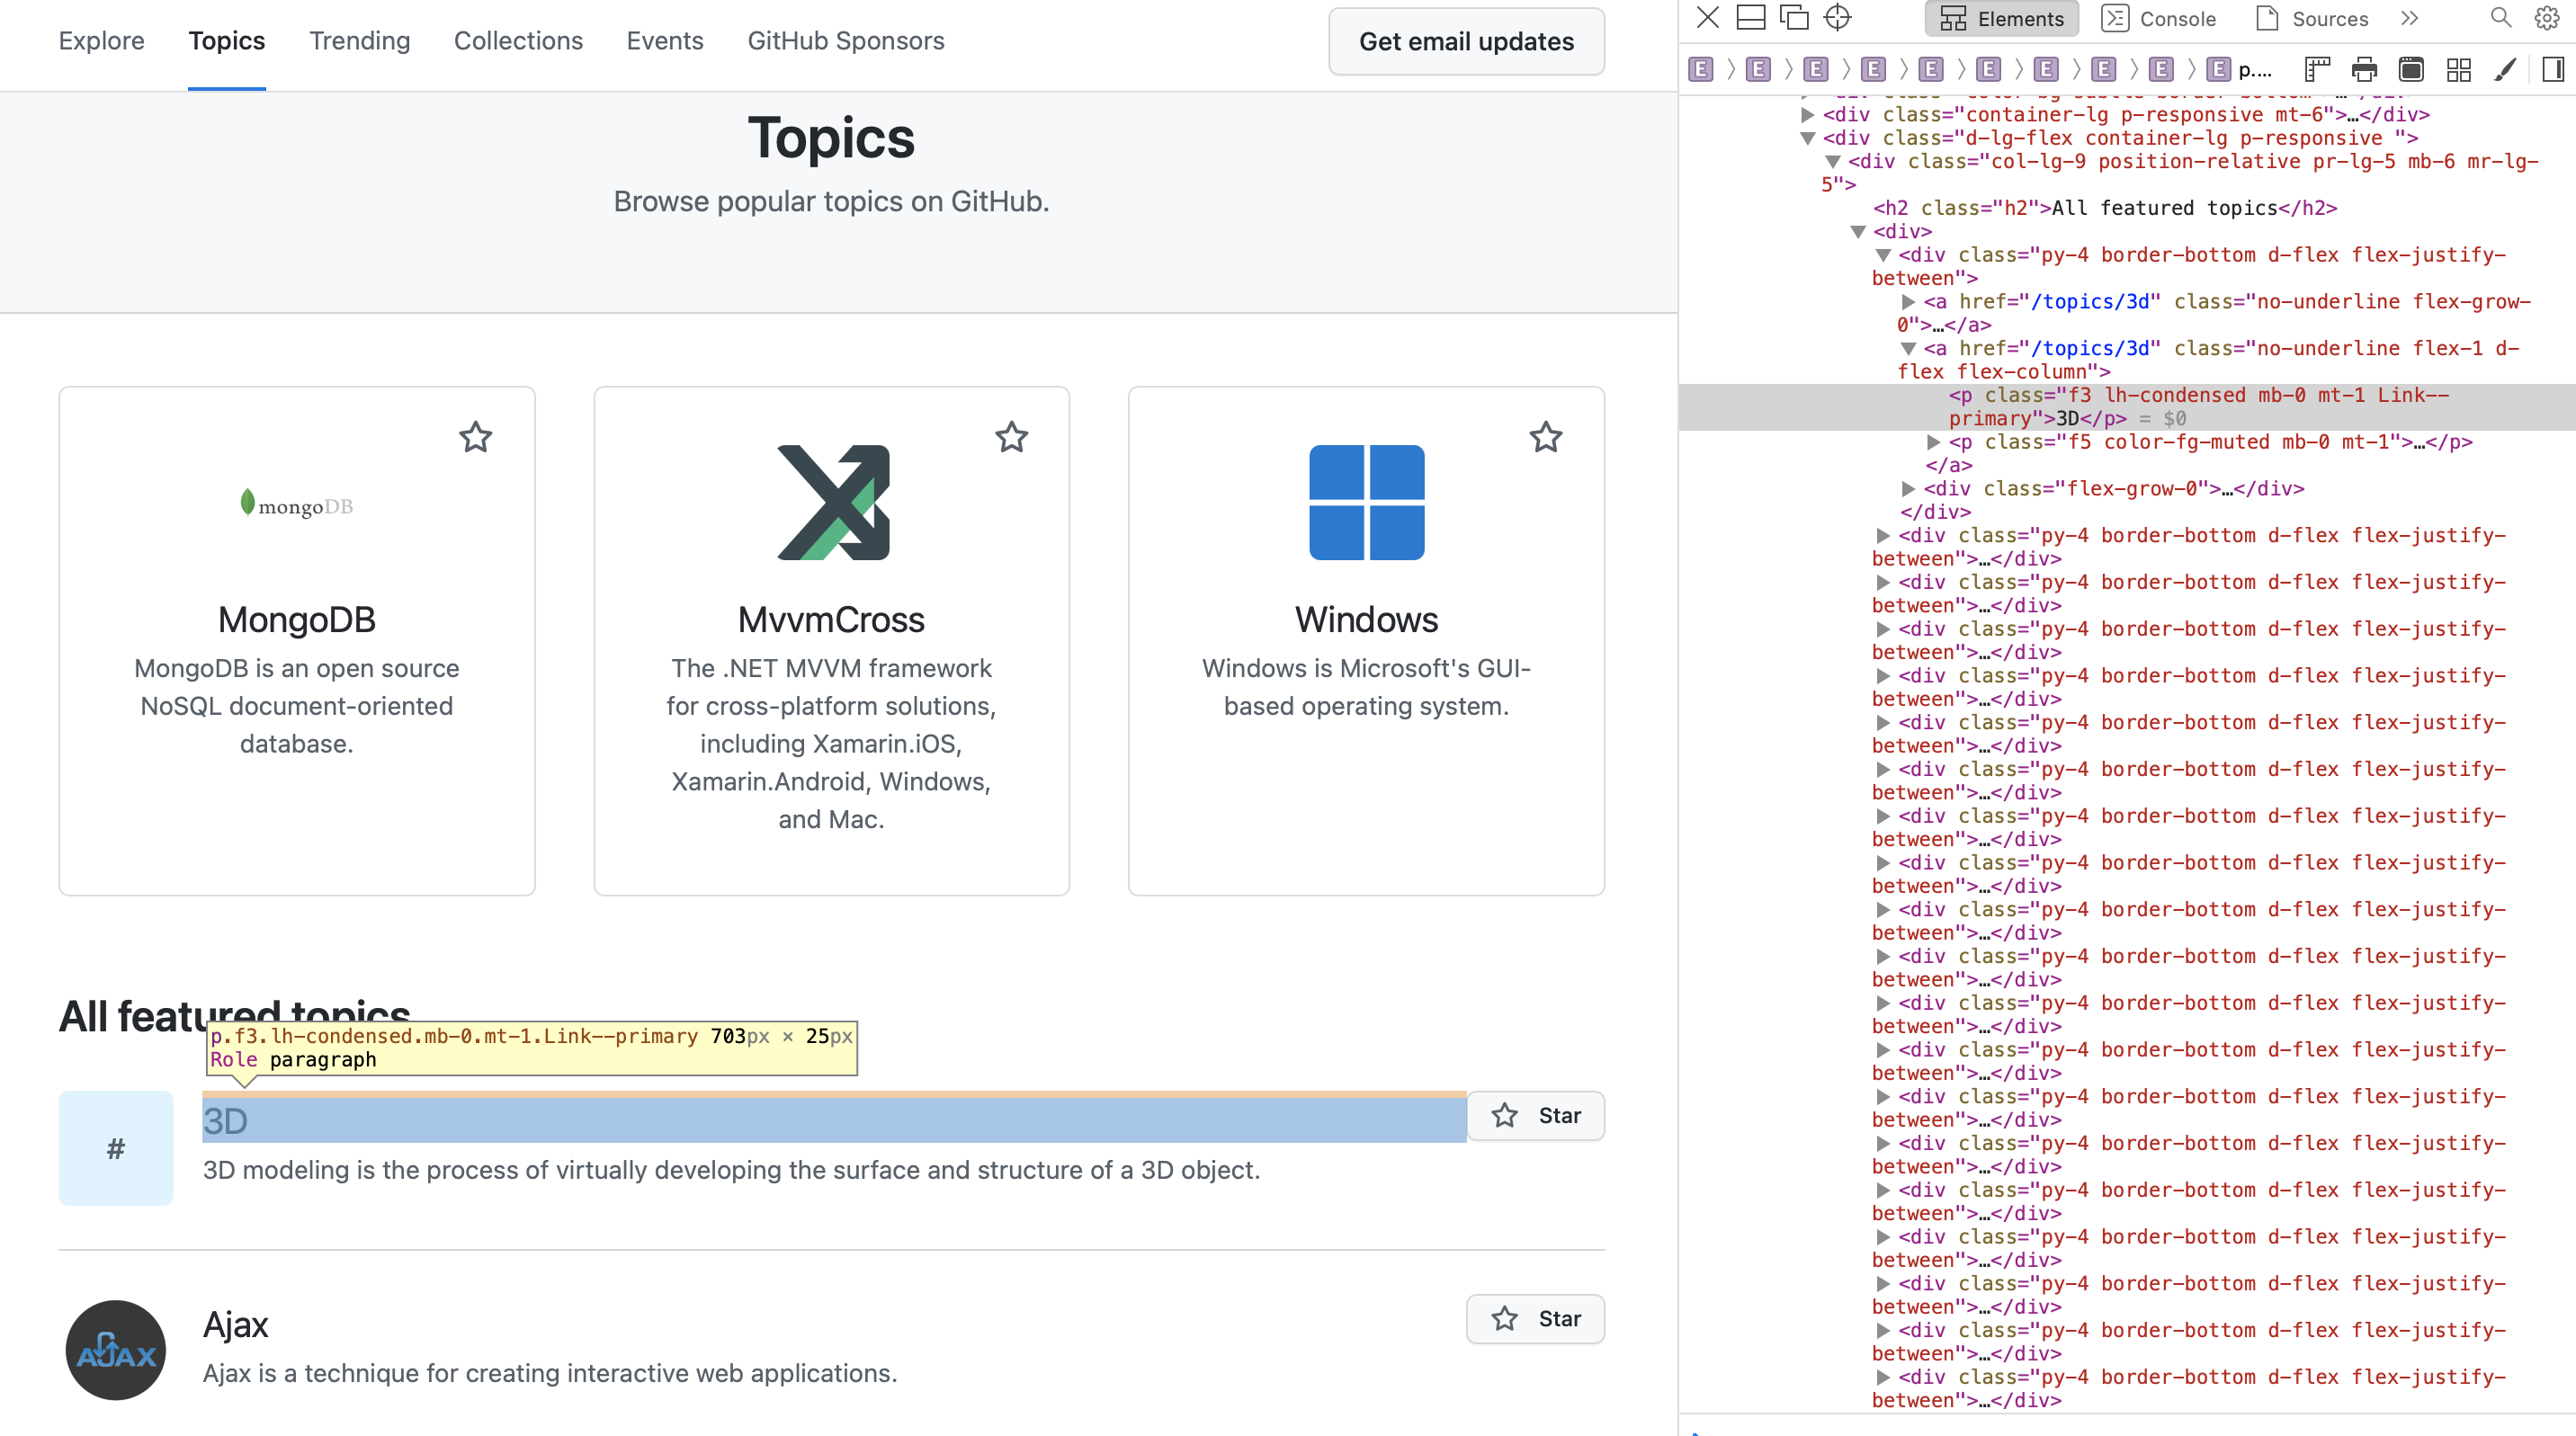

In [85]:
get_topic_titles(doc)



['3D',
 'Ajax',
 'Algorithm',
 'Amp',
 'Android',
 'Angular',
 'Ansible',
 'API',
 'Arduino',
 'ASP.NET',
 'Atom',
 'Awesome Lists',
 'Amazon Web Services',
 'Azure',
 'Babel',
 'Bash',
 'Bitcoin',
 'Bootstrap',
 'Bot',
 'C',
 'Chrome',
 'Chrome extension',
 'Command line interface',
 'Clojure',
 'Code quality',
 'Code review',
 'Compiler',
 'Continuous integration',
 'COVID-19',
 'C++']

In [44]:
len(titles)

30

###  Create  function ( get_topic_descriptions) to get the description 

In [86]:
def get_topic_descs(doc):
    desc_selector = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_selector})
    topic_descs = []
    for tag in topic_desc_tags:
        topic_descs.append(tag.text.strip())
    return topic_descs

for instance- the description of the topic 3d

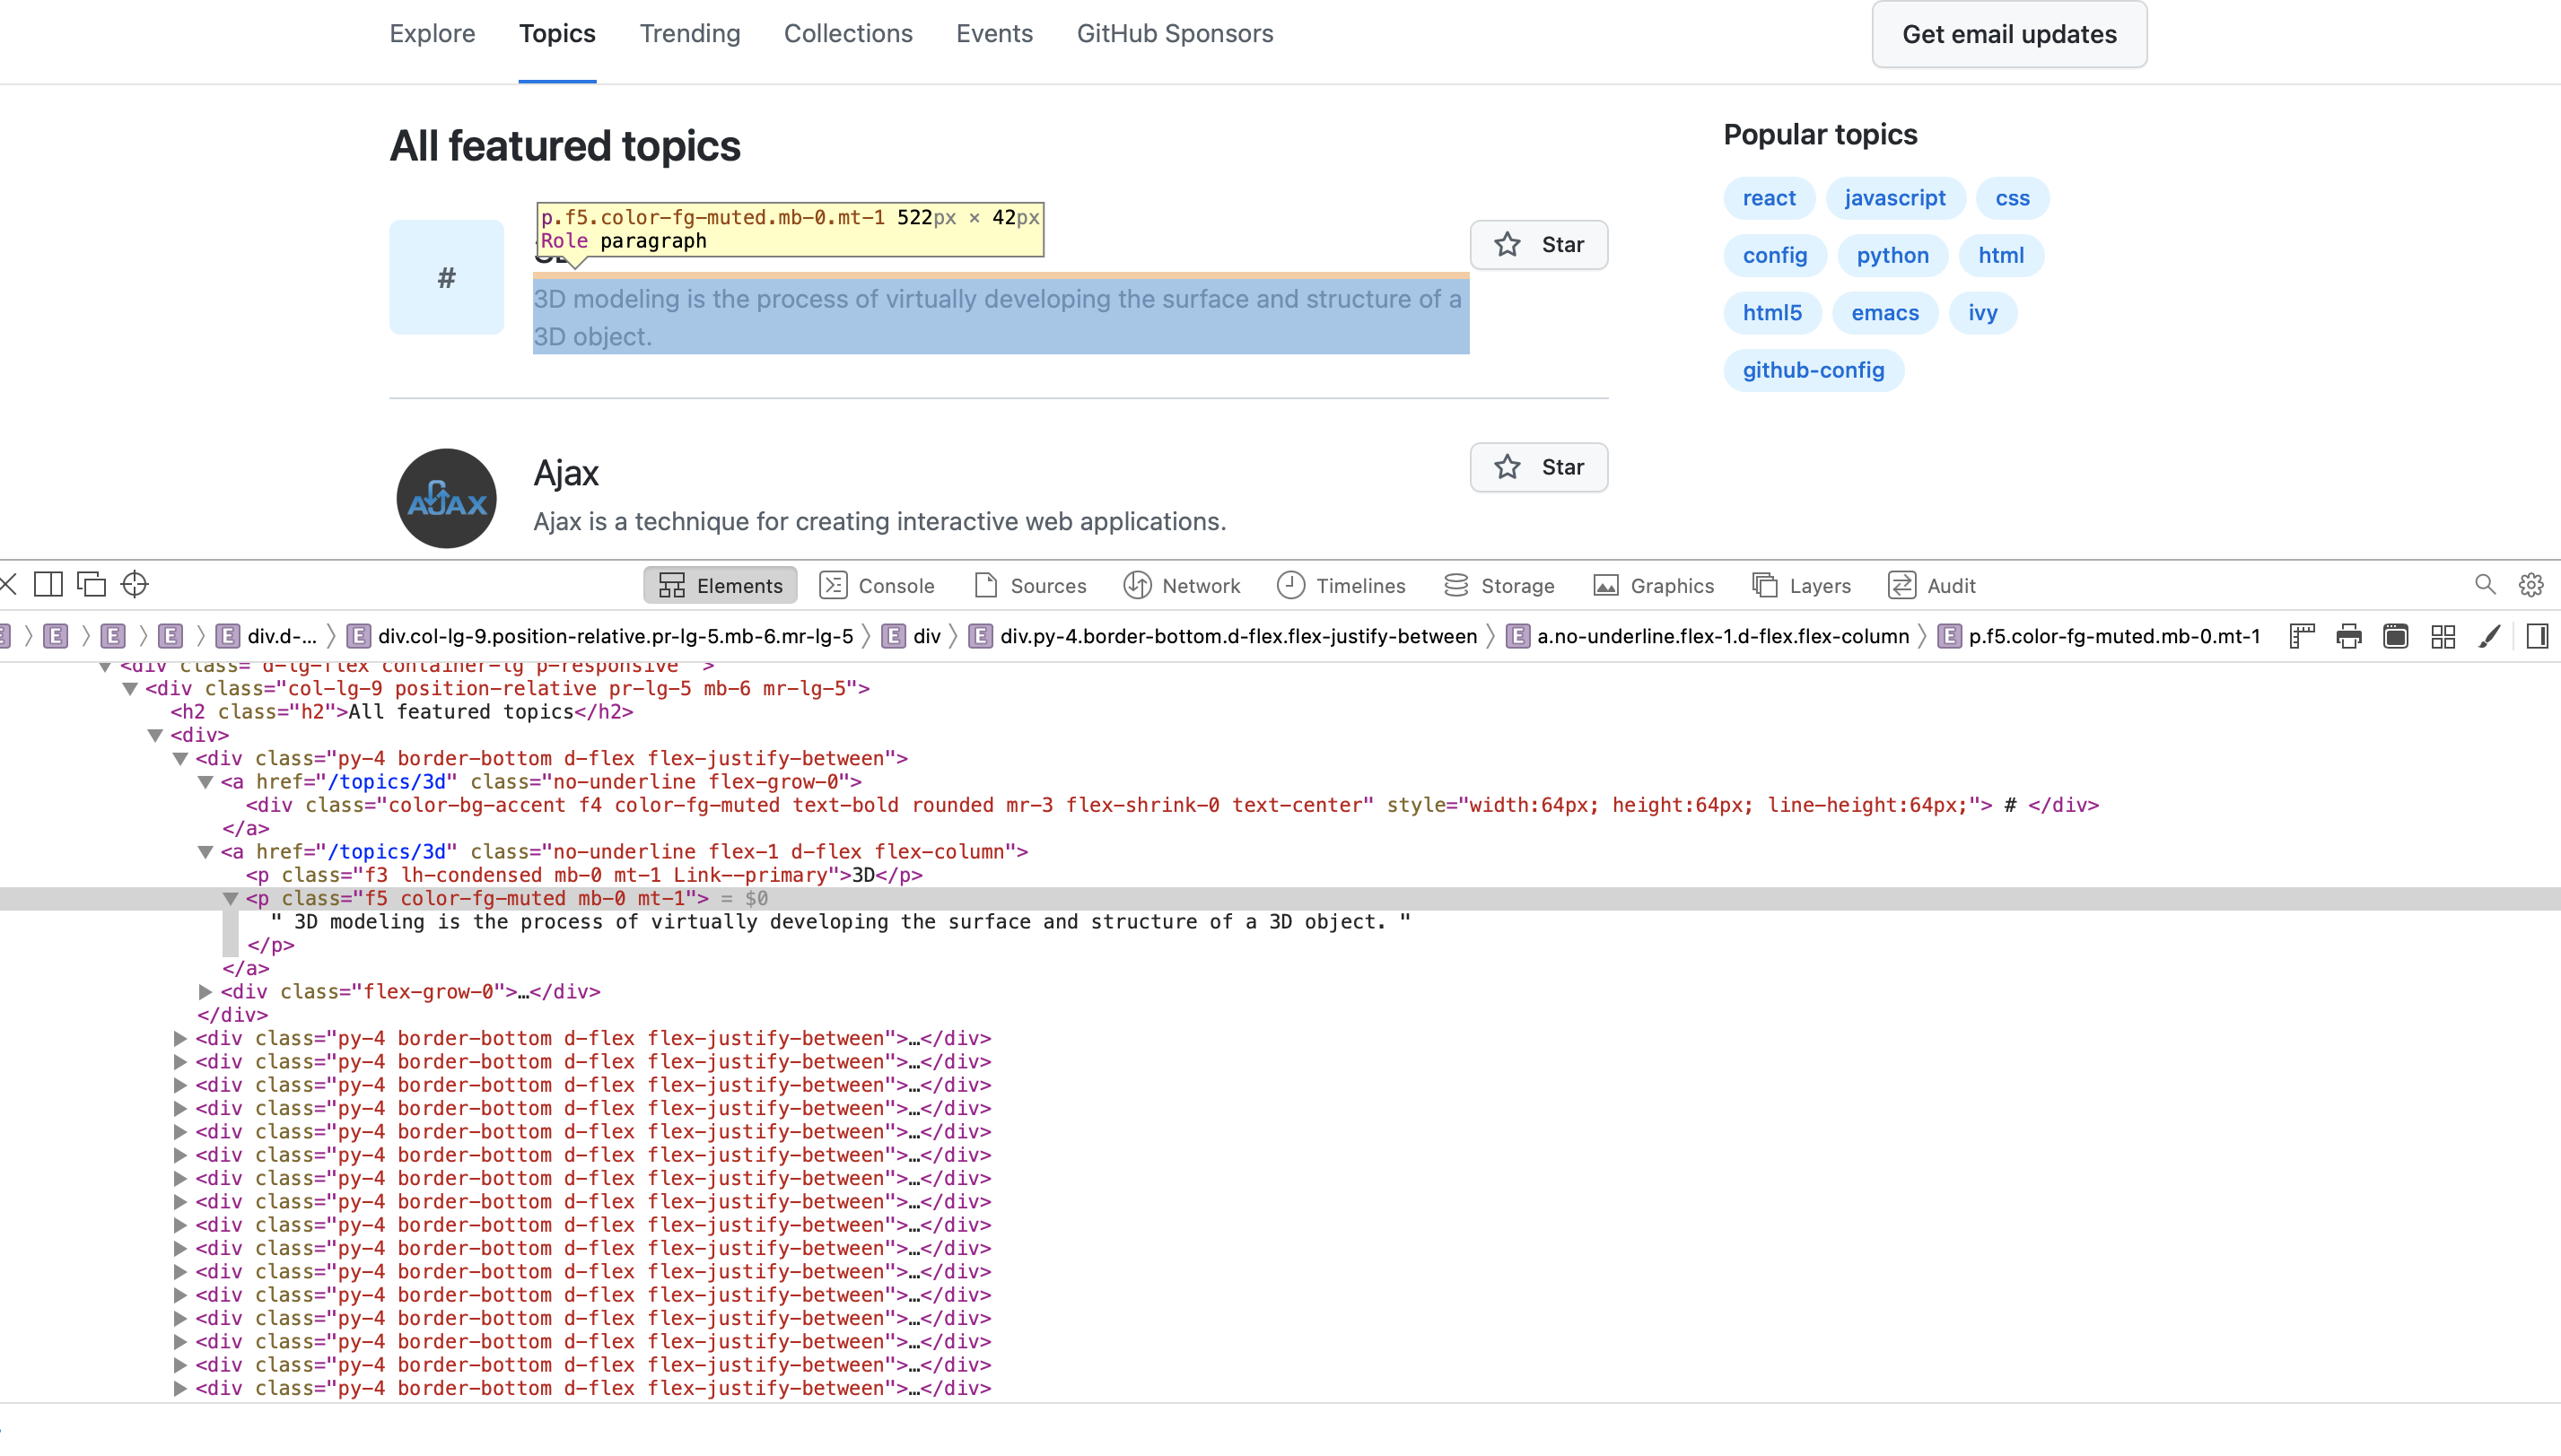

In [87]:
topic_description=get_topic_descs(doc)
topic_description

['3D modeling is the process of virtually developing the surface and structure of a 3D object.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.',
 'Angular is an open source web application platform.',
 'Ansible is a simple and powerful automation engine.',
 'An API (Application Programming Interface) is a collection of protocols and subroutines for building software.',
 'Arduino is an open source hardware and software company and maker community.',
 'ASP.NET is a web framework for building modern web apps and services.',
 'Atom is a open source text editor built with web technologies.',
 'An awesome list is a list of awesome things curated by the community.',
 'Amazon Web Services provides on-demand cloud computing platforms on a subscription basis.',
 'Azu

### Create a function (et_topic_urls ) to get the url 

In [88]:
def get_topic_urls(doc):                              
    topic_url_tags=doc.find_all('a',{'class': 'no-underline flex-1 d-flex flex-column' }) 
    topic_urls=[]
    base_url="https://github.com"
    for tag in topic_url_tags:
        topic_urls.append(base_url+tag['href'])
    return topic_urls

In [89]:
topic_url=get_topic_urls(doc)
topic_url

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/atom',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compil

## We got the title, description and urls of topic lets Putting this all together into a single function


In [90]:
!pip install pandas --upgrad 


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

ambiguous option: --upgrad (--upgrade, --upgrade-strategy?)


In [91]:
import pandas as pd

In [92]:
import pandas as pd
def scrape_topics():
    topic_url='https://github.com/topics'
    response= requests.get(topic_url)
    if response.status_code!=200:
        raise Exception('failed to load page{}'.format(topic_url))
    topic_dict= {
        'title':get_topic_titles(doc),
        'descriptions':get_topic_descs(doc),
        'urls':get_topic_urls(doc)
    }  
    return pd.DataFrame(topic_dict)
    topic_dataframe.to_csv('scrape_topics.csv', index= None)


In [93]:
scrape_topics()

title                                       descriptions  \
0                       3D  3D modeling is the process of virtually develo...   
1                     Ajax  Ajax is a technique for creating interactive w...   
2                Algorithm  Algorithms are self-contained sequences that c...   
3                      Amp  Amp is a non-blocking concurrency library for ...   
4                  Android  Android is an operating system built by Google...   
5                  Angular  Angular is an open source web application plat...   
6                  Ansible  Ansible is a simple and powerful automation en...   
7                      API  An API (Application Programming Interface) is ...   
8                  Arduino  Arduino is an open source hardware and softwar...   
9                  ASP.NET  ASP.NET is a web framework for building modern...   
10                    Atom  Atom is a open source text editor built with w...   
11           Awesome Lists  An awesome list is a list of awesome things cu...   
12     Amazon Web Services  Amazon Web Services provides on-demand cloud c...   
13                   Azure  Azure is a cloud computing service created by ...   
14                   Babel  Babel is a compiler for writing next generatio...   
15                    Bash  Bash is a shell and command language interpret...   
16                 Bitcoin  Bitcoin is a cryptocurrency developed by Satos...   
17               Bootstrap  Bootstrap is an HTML, CSS, and JavaScript fram...   
18                     Bot  A bot is an application that runs automated ta...   
19                       C  C is a general purpose programming language th...   
20                  Chrome  Chrome is a web browser from the tech company ...   
21        Chrome extension  Chrome extensions enable users to customize th...   
22  Command line interface  A CLI, or command-line interface, is a console...   
23                 Clojure  Clojure is a dynamic, general-purpose programm...   
24            Code quality  Automate your code review with style, quality,...   
25             Code review  Ensure your code meets quality standards and s...   
26                Compiler  Compilers are software that translate higher-l...   
27  Continuous integration  Automatically build and test your code as you ...   
28                COVID-19  The coronavirus disease 2019 (COVID-19) is an ...   
29                     C++  C++ is a general purpose and object-oriented p...   

                                                urls  
0                       https://github.com/topics/3d  
1                     https://github.com/topics/ajax  
2                https://github.com/topics/algorithm  
3                    https://github.com/topics/amphp  
4                  https://github.com/topics/android  
5                  https://github.com/topics/angular  
6                  https://github.com/topics/ansible  
7                      https://github.com/topics/api  
8                  https://github.com/topics/arduino  
9                   https://github.com/topics/aspnet  
10                    https://github.com/topics/atom  
11                 https://github.com/topics/awesome  
12                     https://github.com/topics/aws  
13                   https://github.com/topics/azure  
14                   https://github.com/topics/babel  
15                    https://github.com/topics/bash  
16                 https://github.com/topics/bitcoin  
17               https://github.com/topics/bootstrap  
18                     https://github.com/topics/bot  
19                       https://github.com/topics/c  
20                  https://github.com/topics/chrome  
21        https://github.com/topics/chrome-extension  
22                     https://github.com/topics/cli  
23                 https://github.com/topics/clojure  
24            https://github.com/topics/code-quality  
25             https://github.com/topics/code-review  
26                https:

### Get the top 30 repository from a Topic page

Steps to extract repositories:
- Download the page
- Check successful response
- parse using Beautiful soup
- using `def get_repository_info(h3_tag,star_tag)`, to return all the required infomation about a repository.
- Using `def get_topic_repository(topic_doc)`, to get the h3 tags containing repo title, repo URL and username

In [94]:
def get_topic_page(topic_url):
    # Download the page
    topic_url
    response = requests.get(topic_url)
    # Check successful response
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    # Parse using Beautiful soup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc

In [95]:
topic_doc=get_topic_page('https://github.com/topics/3d')
topic_doc


<!DOCTYPE html>

<html data-a11y-animated-images="system" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-92c7d381038e.css" integrity="sha512-ksfTgQOOnE+FFXf+yNfVjKSlEckJAdufFIYGK7ZjRhWcZgzAGcmZqqArTgMLpu90FwthqcCX4ldDgKXbmVMeuQ==" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-d4a90c367f0c.css" integrity="sha512-1KkMNn8M/al/dtzBLupRwkIOgnA9MWkm8oxS+sol

The H3 tag, will help in getting the name of the sub-topic of a particular topic (for eg: mr.doop in the topic 3D).

In [96]:
def get_repo_info(h3_tag, star_tag):
    # returns all the required info about a repository
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url =  'https://github.com' + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username, repo_name, stars, repo_url

def parse_star_count(stars):
    stars=stars.strip()
    if stars[-1]=='k':
        return int(float(stars[:-1])*1000)
    return(int(stars))



In [97]:
def get_topic_repos(topic_doc):
    # Get the h1 tags containing repo title, repo URL and username
    repo_tags = topic_doc.find_all('article',{'class':'border rounded color-shadow-small color-bg-subtle my-4'})


    # Get star tags
    star_tags=topic_doc.find_all('span',{'id':'repo-stars-counter-star'})
    
    topic_repos_dict = { 'username': [], 'repo_name': [], 'stars': [],'repo_url': []}

    # Get repo info
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])
        
    return pd.DataFrame(topic_repos_dict)


In [98]:
get_topic_repos(topic_doc)

username            repo_name  stars  \
0                                  mrdoob  82200   
1             libgdx               libgdx  20000   
2             pmndrs    react-three-fiber  18000   
3                               BabylonJS  17400   
4           aframevr               aframe  14200   
5              ssloy         tinyrenderer  13700   
6                                 lettier  13000   
7            FreeCAD              FreeCAD  11400   
8                               metafizzy   9200   
9           CesiumGS               cesium   8700   
10       timzhang642  3D-Machine-Learning   8000   
11      a1studmuffin   SpaceshipGenerator   7100   
12                                isl-org   6800   
13                                blender   5600   
14           domlysz           BlenderGIS   5200   
15          spritejs             spritejs   4900   
16          openscad             openscad   4800   
17           jagenjo       webglstudio.js   4600   
18  tensorspace-team          tensorspace   4600   
19           YadiraF                PRNet   4600   
20      AaronJackson                  vrn   4400   
21            google         model-viewer   4300   
22             ssloy        tinyraytracer   4200   
23             mosra               magnum   4000   
24       FyroxEngine                Fyrox   4000   
25   gfxfundamentals   webgl-fundamentals   3600   
26                                tengbao   3600   
27         cleardusk                3DDFA   3300   
28                              jasonlong   3200   
29    cnr-isti-vclab              meshlab   3000   

                                             repo_url  
0                           https://github.com/mrdoob  
1                    https://github.com/libgdx/libgdx  
2         https://github.com/pmndrs/react-three-fiber  
3                        https://github.com/BabylonJS  
4                  https://github.com/aframevr/aframe  
5               https://github.com/ssloy/tinyrenderer  
6                          https://github.com/lettier  
7                  https://github.com/FreeCAD/FreeCAD  
8                        https://github.com/metafizzy  
9                  https://github.com/CesiumGS/cesium  
10  https://github.com/timzhang642/3D-Machine-Lear...  
11  https://github.com/a1studmuffin/SpaceshipGener...  
12                         https://github.com/isl-org  
13                         https://github.com/blender  
14              https://github.com/domlysz/BlenderGIS  
15               https://github.com/spritejs/spritejs  
16               https://github.com/openscad/openscad  
17          https://github.com/jagenjo/webglstudio.js  
18    https://github.com/tensorspace-team/tensorspace  
19                   https://github.com/YadiraF/PRNet  
20                https://github.com/AaronJackson/vrn  
21             https://github.com/google/model-viewer  
22             https://github.com/ssloy/tinyraytracer  
23                    https://github.com/mosra/magnum  
24               https://github.com/FyroxEngine/Fyrox  
25  https://github.com/gfxfundamentals/webgl-funda...  
26                         https://github.com/tengbao  
27                 https://github.com/cleardusk/3DDFA  
28                       https://github.com/jasonlong  
29          https://github.com/cnr-isti-vclab/meshlab

In [99]:
import os
def scrape_topic(topic_url, path):
    if os.path.exists(path):
        print("The file {} already exists. Skipping...".format(path))
        return
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path, index=None)

## Putting all together(scrape_topics_repos)
- we have a function to get the list of topics
- we have a function to create a CSV file for scraped repositorymfrom a topics page
- lets create a function to put them together.

In [104]:
import os
def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()
    
    os.makedirs('data', exist_ok=True)
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['title']))
        scrape_topic(row['urls'], 'data/{}.csv'.format(row['title']))

In [106]:
scrape_topics_repos()

Scraping list of topics
Scraping top repositories for "3D"
The file data/3D.csv already exists. Skipping...
Scraping top repositories for "Ajax"
The file data/Ajax.csv already exists. Skipping...
Scraping top repositories for "Algorithm"
The file data/Algorithm.csv already exists. Skipping...
Scraping top repositories for "Amp"
The file data/Amp.csv already exists. Skipping...
Scraping top repositories for "Android"
The file data/Android.csv already exists. Skipping...
Scraping top repositories for "Angular"
The file data/Angular.csv already exists. Skipping...
Scraping top repositories for "Ansible"
The file data/Ansible.csv already exists. Skipping...
Scraping top repositories for "API"
The file data/API.csv already exists. Skipping...
Scraping top repositories for "Arduino"
The file data/Arduino.csv already exists. Skipping...
Scraping top repositories for "ASP.NET"
The file data/ASP.NET.csv already exists. Skipping...
Scraping top repositories for "Atom"
The file data/Atom.csv alre

###  Data stored in data folders are 
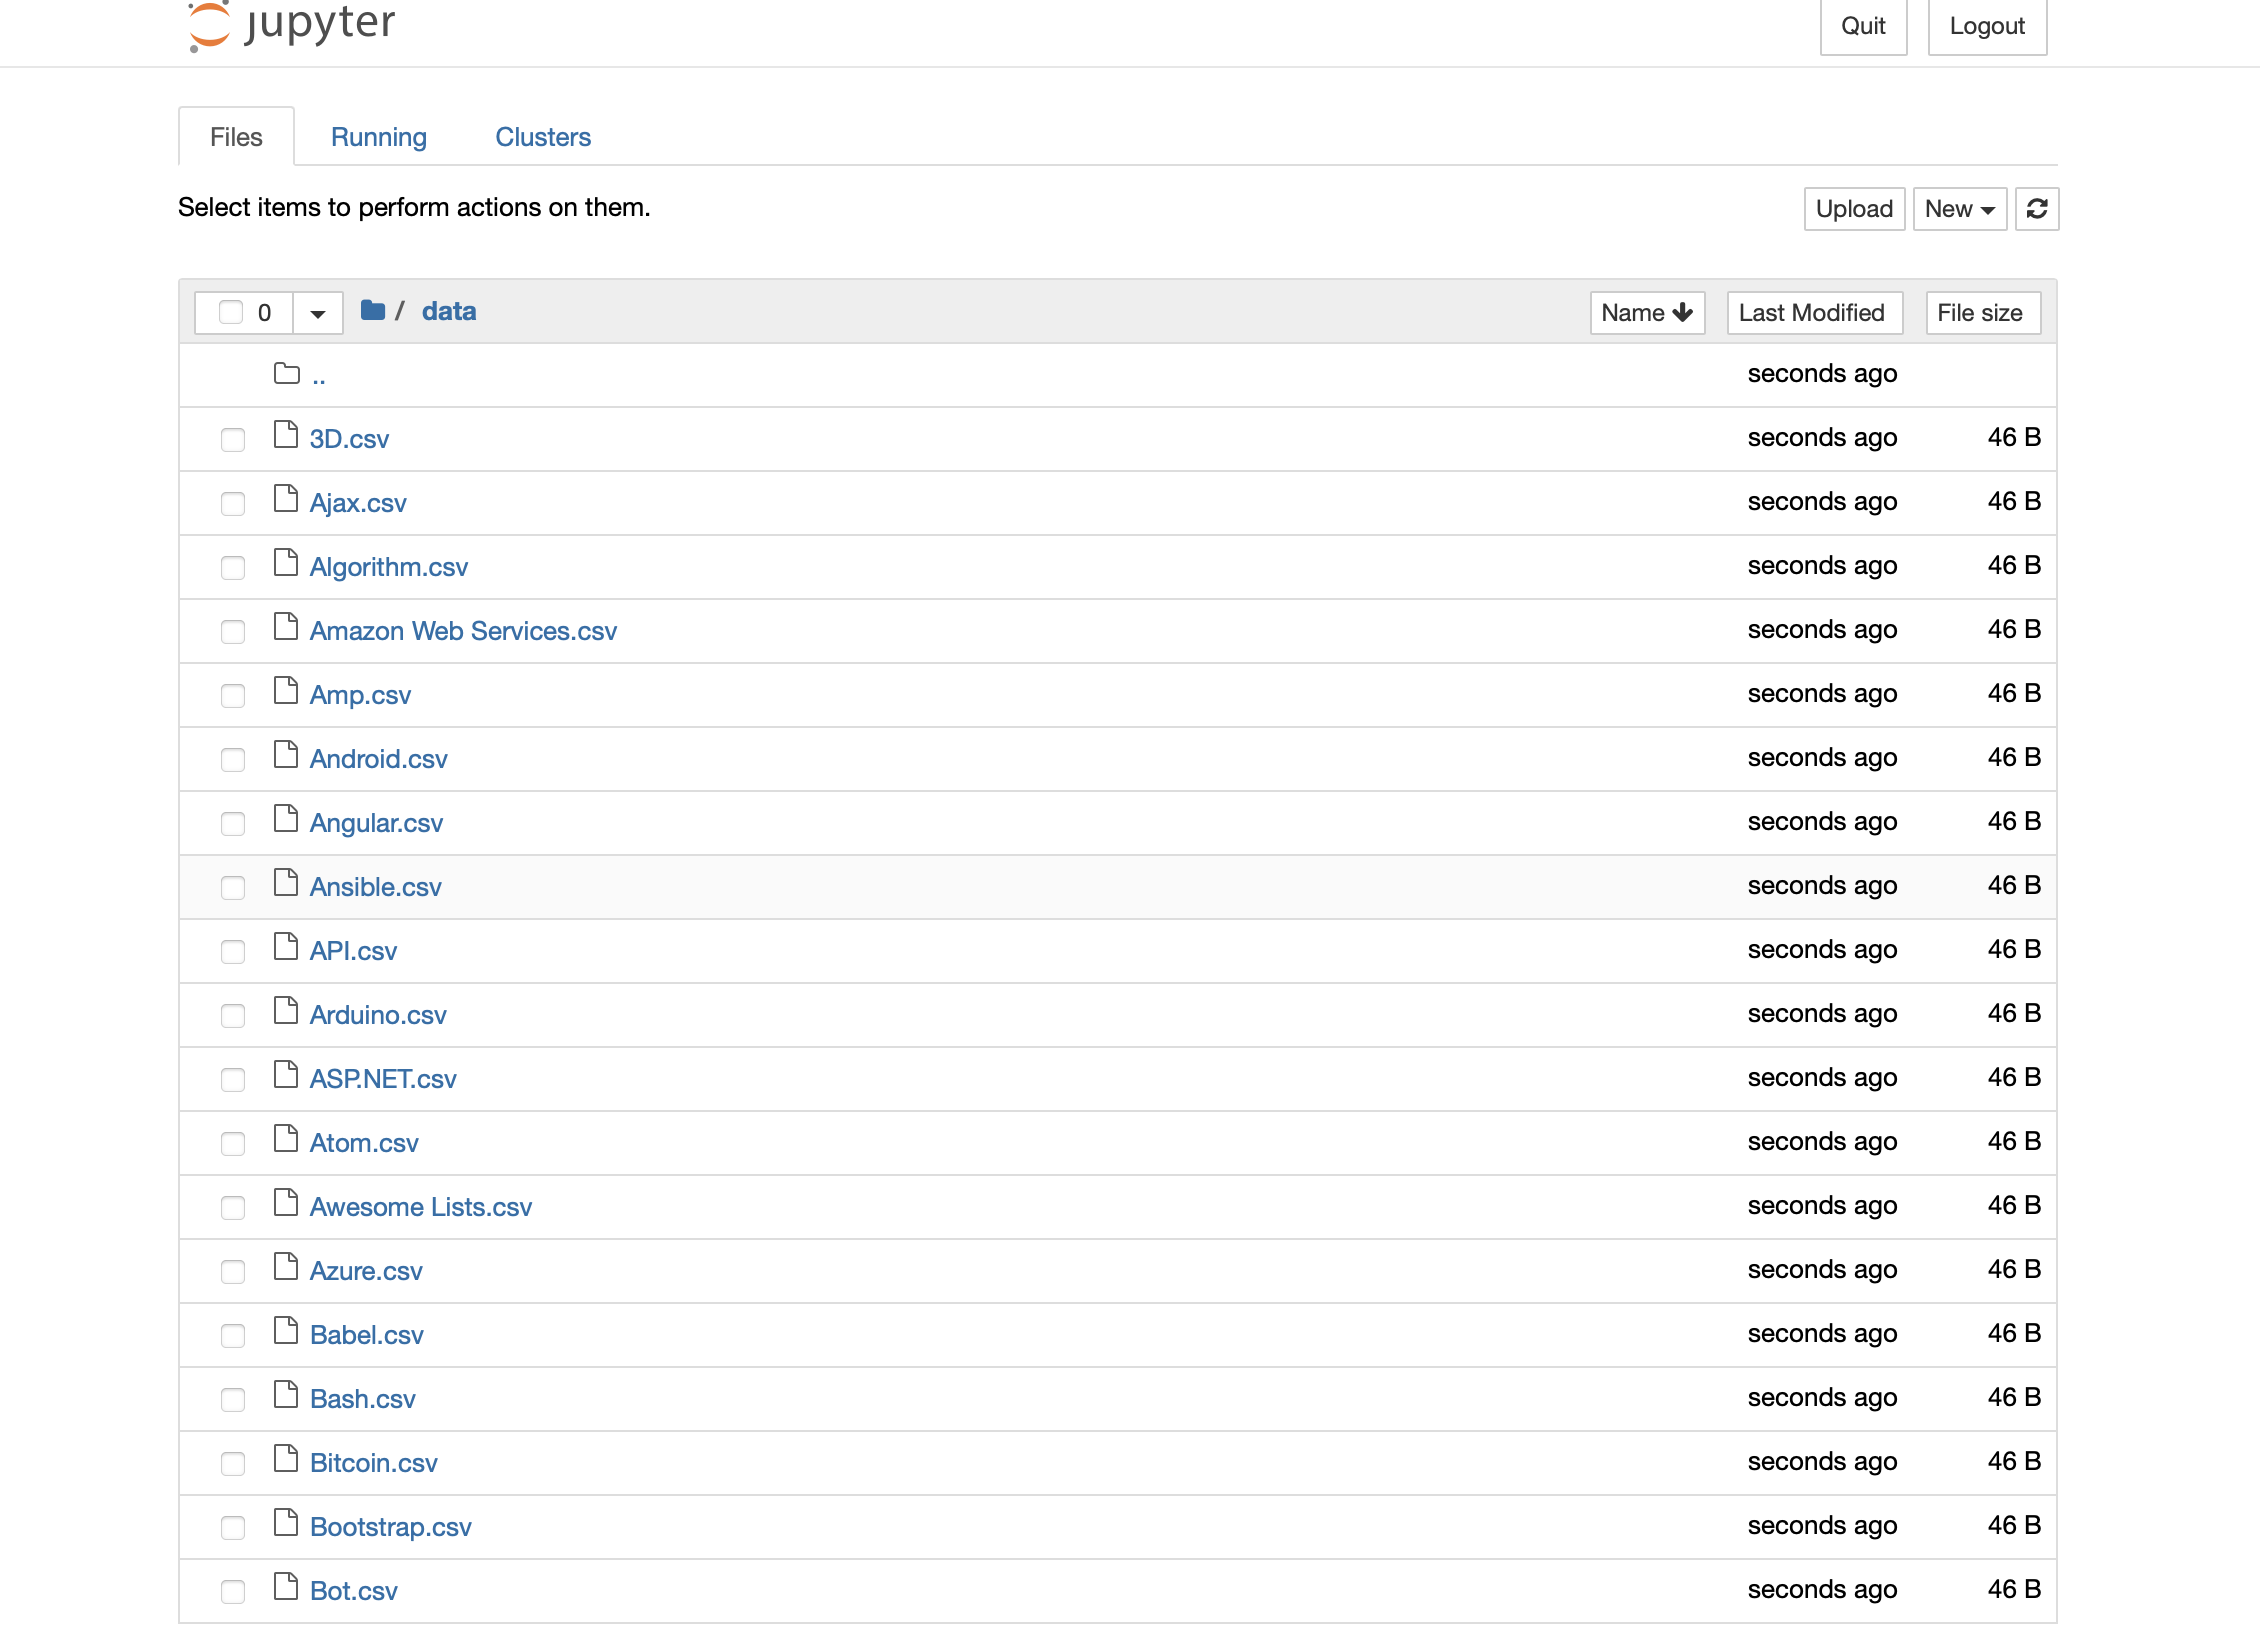







### Data store in csv file 

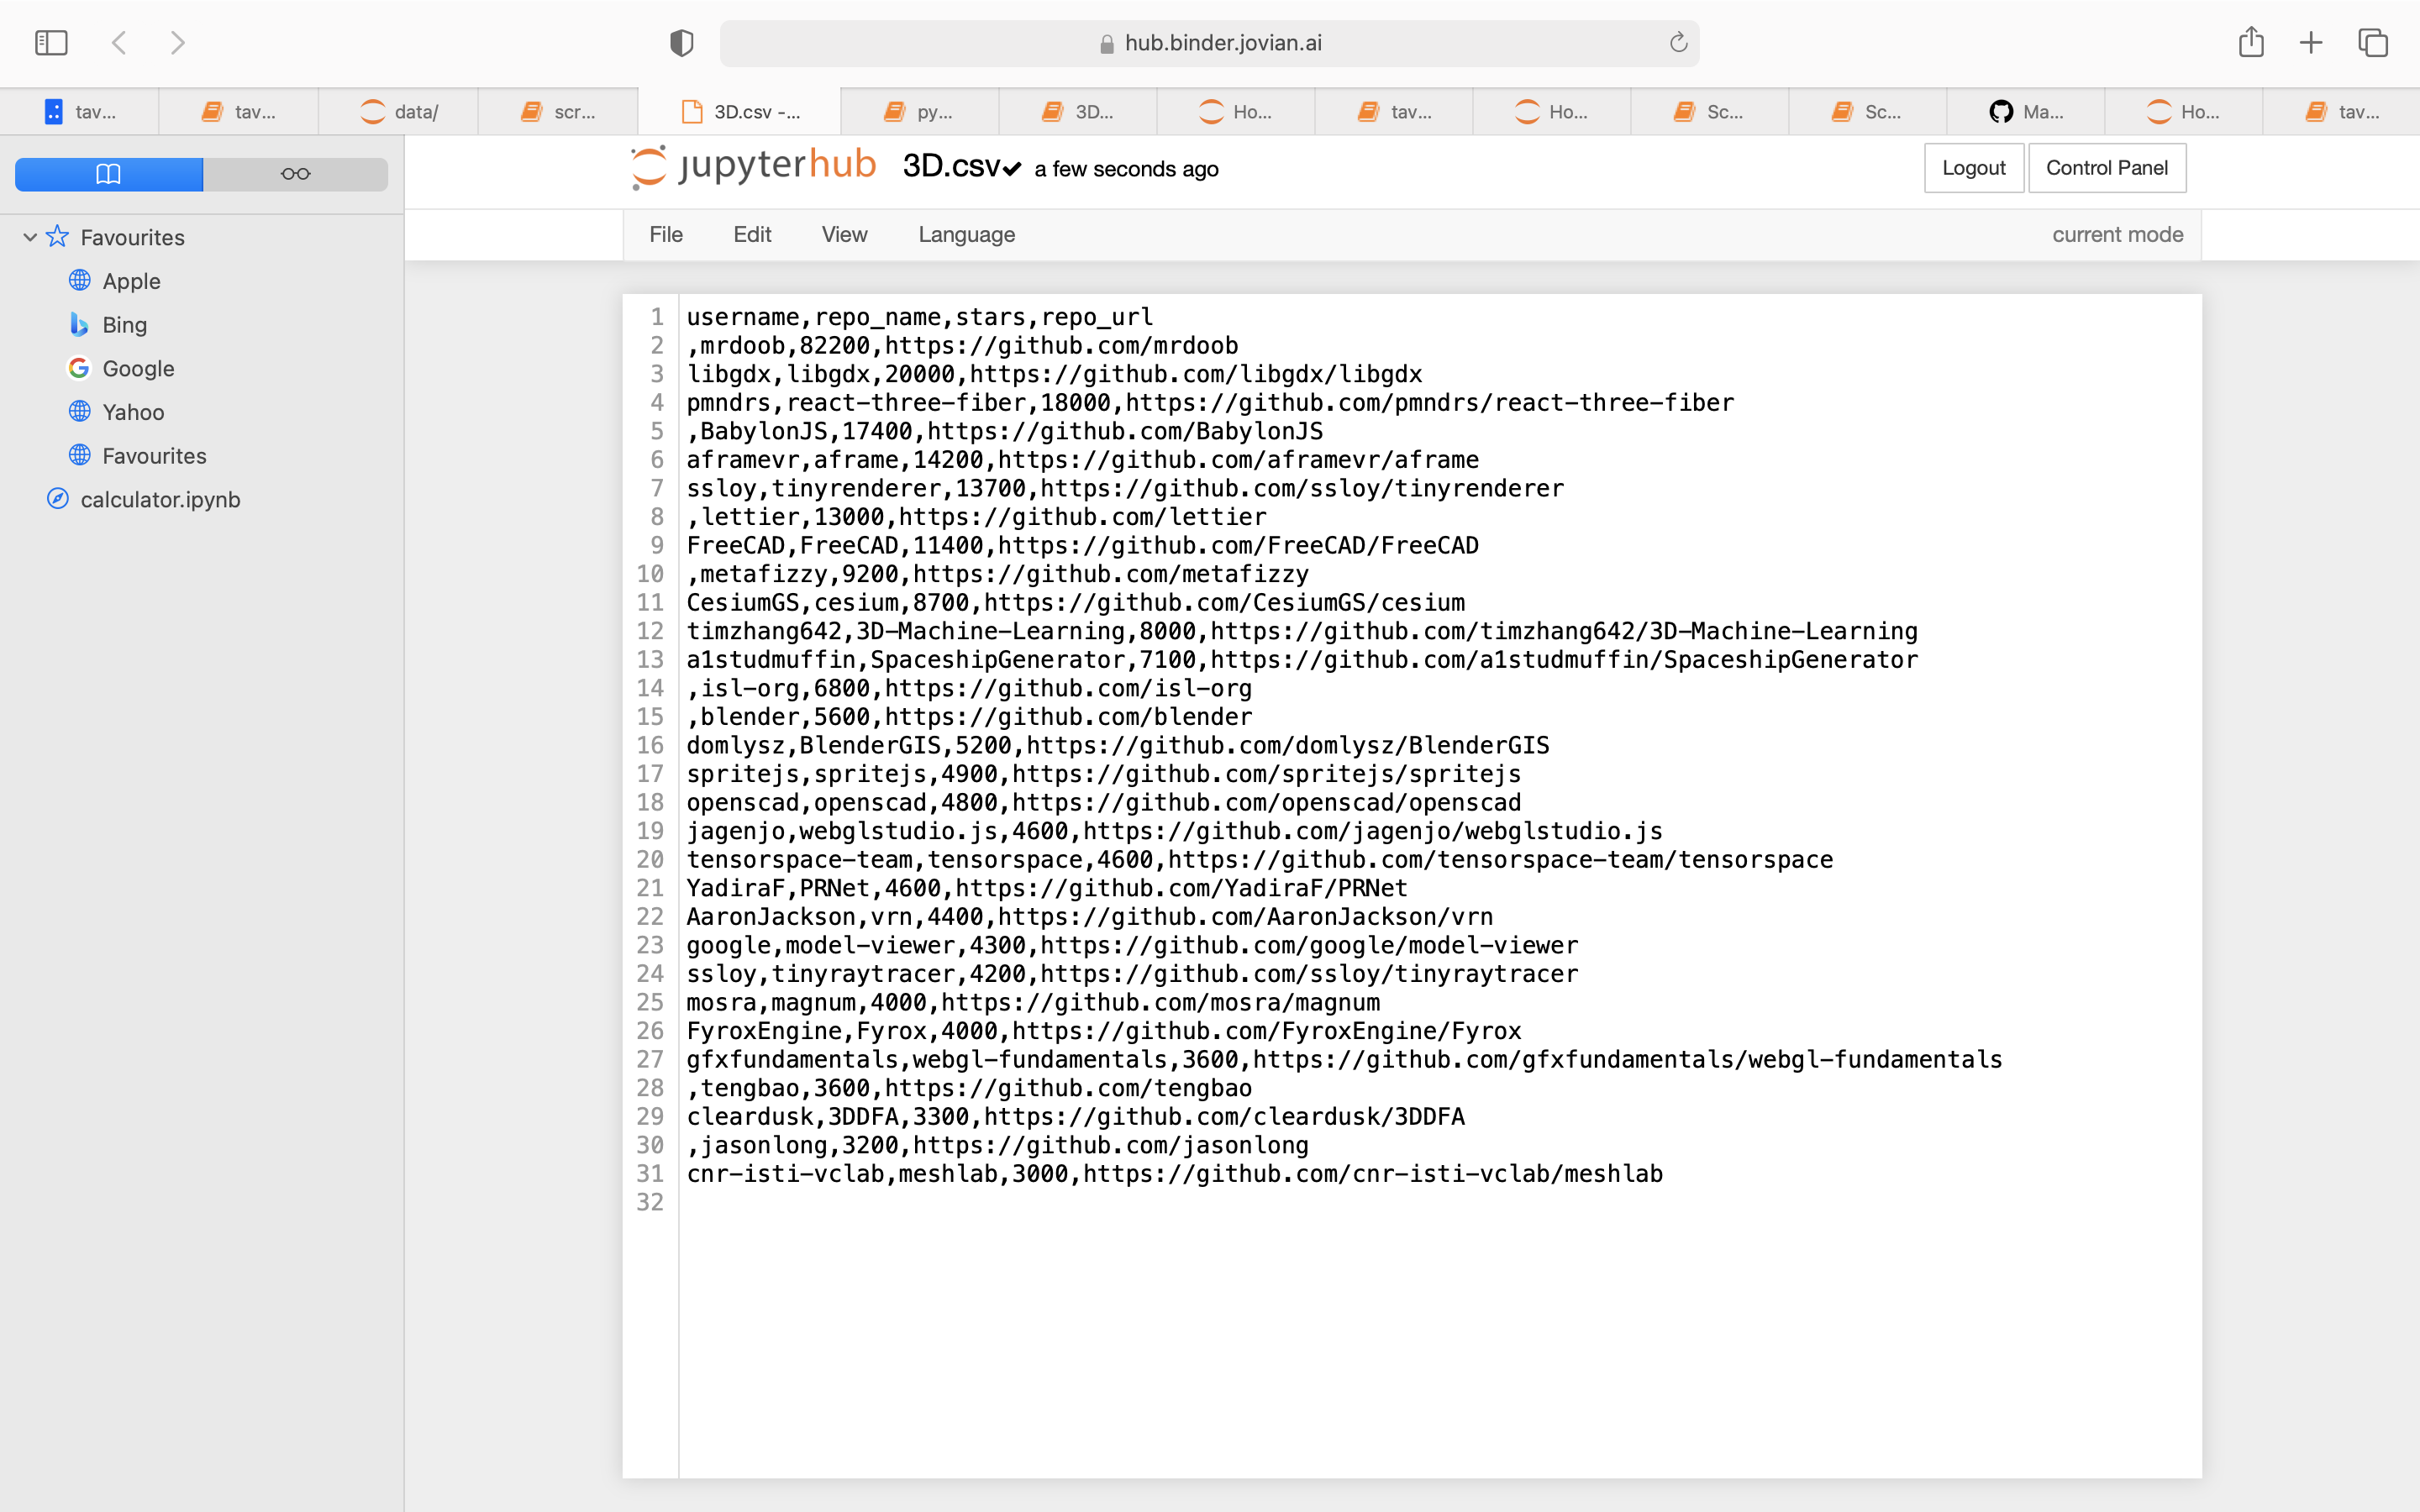

# summary

#### What we have done so far was

- Install and import libraries

- Download and Parse the Best seller HTML page source code using resquest and Beautifulsoup to get item categories topics URL.

- Each obtained item topic obtained using corresponding URL
Extract information from each page

- Combine the extracted information Extract information from each pages data in a Python Dictionaries

- Save the information data to CSV file Using Pandas library


